In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
region = np.genfromtxt('205.csv',delimiter=',').astype(int)
total = np.genfromtxt('total.csv',delimiter=',').astype(int)
region_better = np.genfromtxt('205_better.csv',delimiter=',').astype(int)
total_better = np.genfromtxt('total_better.csv',delimiter=',').astype(int)

In [3]:
style.use('ggplot')

# This plot show that:
# Without sampling by region, label type distribution in a region will change when zoom out
# But if sampling are carried out region by region the distribution is preserved.

In [14]:
label_type_id = np.linspace(1,7,7)
label_type = ['Curb Ramp', 'No Curb Ramp','Obstacle','Suface Problem','Other','Other','Occlusion','NoSidewalk']
tick_rotation = 15
title_font_size = 24
axes_font_size =20
tick_font_size = 16

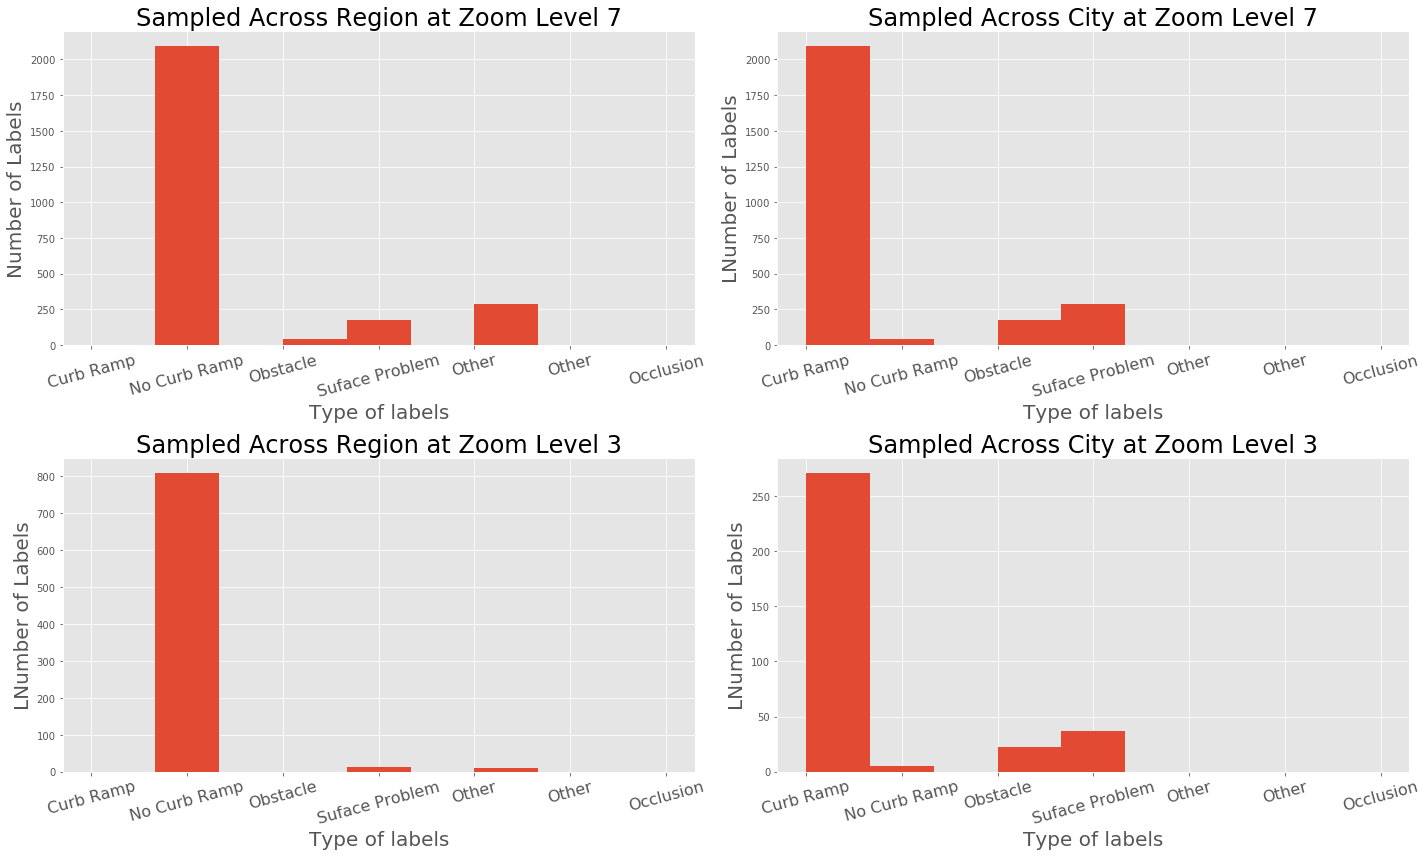

In [15]:
f, ax = plt.subplots(2,2,figsize = (20,12))
ax.flat[0].set_title("Sampled Across Region at Zoom Level 7",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = region[7])
ax.flat[0].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[0].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[2].set_title("Sampled Across Region at Zoom Level 3",fontsize = title_font_size)
ax.flat[2].hist(label_type_id, 9, weights = region[3])
ax.flat[2].set_ylabel("LNumber of Labels", fontsize= axes_font_size)
ax.flat[2].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[1].set_title("Sampled Across City at Zoom Level 7",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = region_better[7])
ax.flat[1].set_ylabel("LNumber of Labels", fontsize= axes_font_size)
ax.flat[1].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[3].set_title("Sampled Across City at Zoom Level 3",fontsize = title_font_size)
ax.flat[3].hist(label_type_id, 9, weights = region_better[3])
ax.flat[3].set_ylabel("LNumber of Labels", fontsize= axes_font_size)
ax.flat[3].set_xlabel("Type of labels", fontsize= axes_font_size)
plt.sca(ax[0, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[0, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.tight_layout()
plt.show()

# This plot shows the distribution of label type is preserved in different zoom level

In [ ]:
f, ax = plt.subplots(1,2,figsize = (20,6))
ax.flat[0].set_title("Zoom level 7")
ax.flat[0].hist(zoomlevel, 9, weights = total[7])
ax.flat[0].set_ylabel("Label Number")
ax.flat[0].set_xlabel("Label Type")

ax.flat[1].set_title("Zoom level 3")
ax.flat[1].hist(zoomlevel, 9, weights = total[3])
ax.flat[1].set_ylabel("Label Number")
ax.flat[1].set_xlabel("Label Type")

plt.show()

In [ ]:
plt.title("Label Shown in Region 205 at Zoom level 7")
plt.hist(zoomlevel, 9, weights = region[7])
plt.ylabel("Label Number")
plt.xlabel("Label Type")
plt.show()

plt.title("Label Shown in Region 205 at Zoom level 3")
plt.hist(zoomlevel, 9, weights = region[3])
plt.ylabel("Label Number")
plt.xlabel("Label Type")
plt.show()

In [ ]:
plt.title("Label Shown in Region 205 at Zoom level 7")
plt.hist(zoomlevel, 9, weights = region[7])
plt.ylabel("Label Number")
plt.xlabel("Label Type")
plt.show()

plt.title("Label Shown in Region 205 at Zoom level 3")
plt.hist(zoomlevel, 9, weights = region[3])
plt.ylabel("Label Number")
plt.xlabel("Label Type")
plt.show()